In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [2]:
df = pd.read_csv('../pn500.csv')

In [24]:
import glob

In [25]:
df_list = glob.glob('../*.csv')

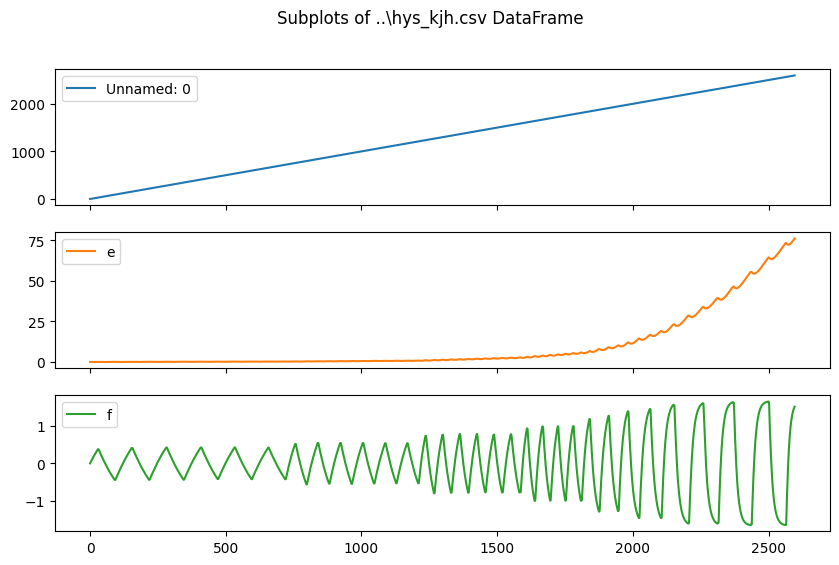

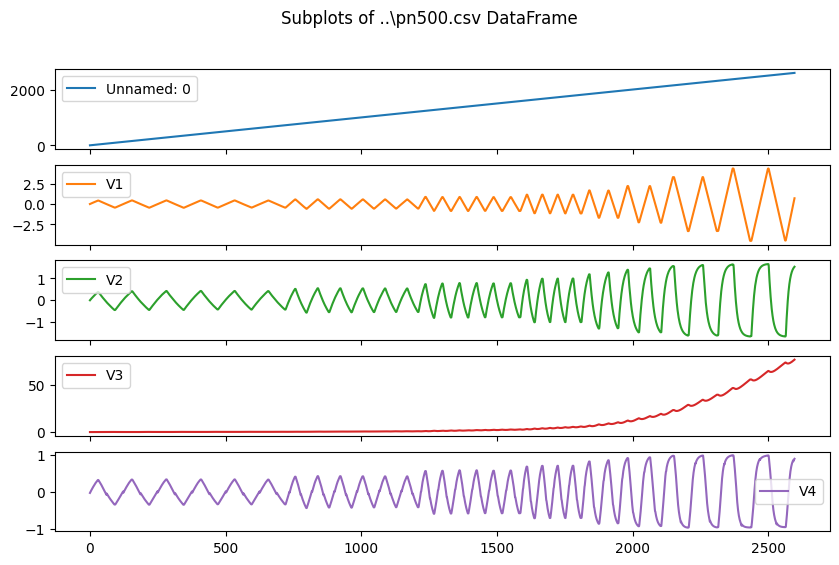

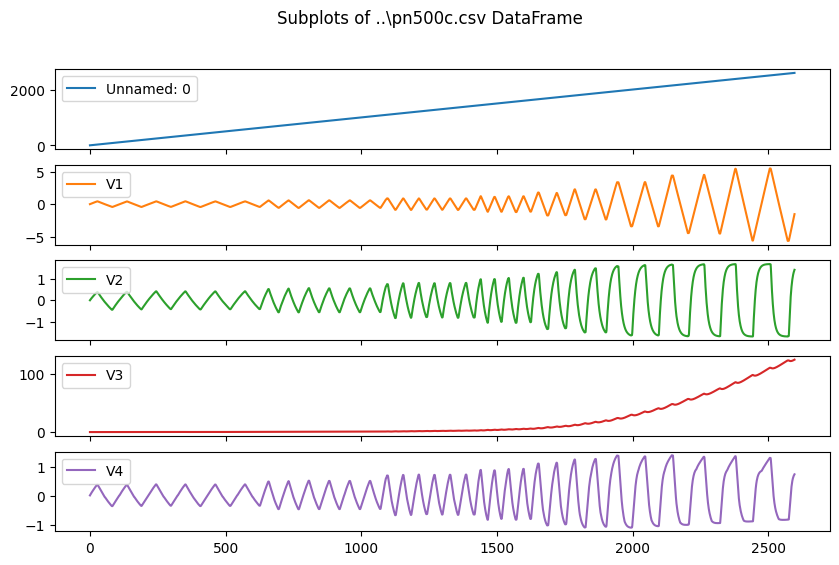

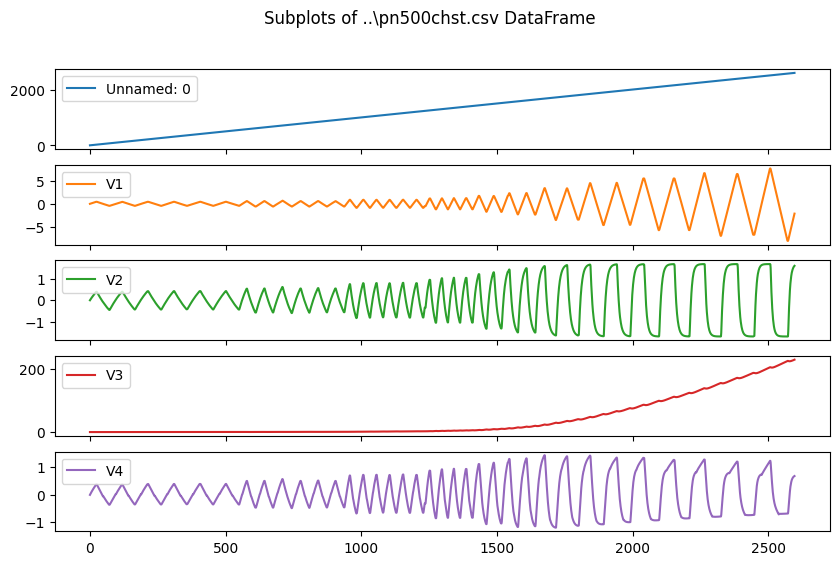

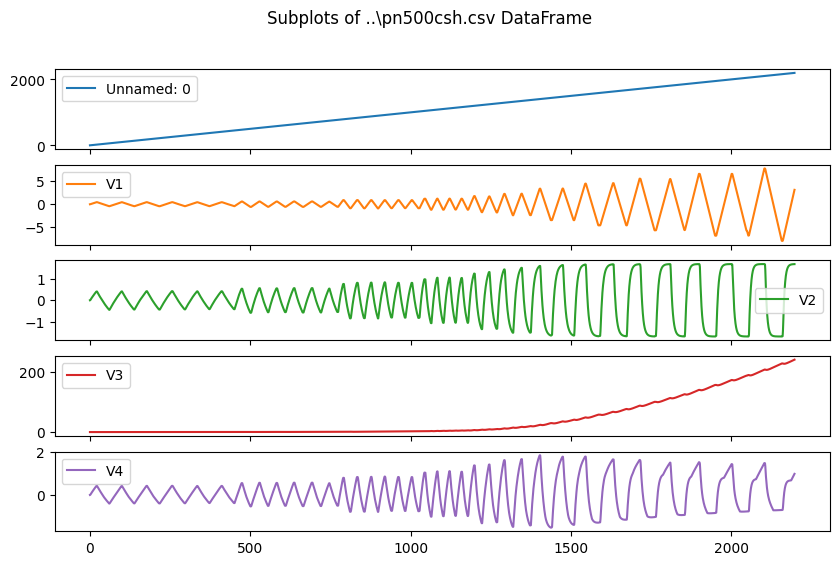

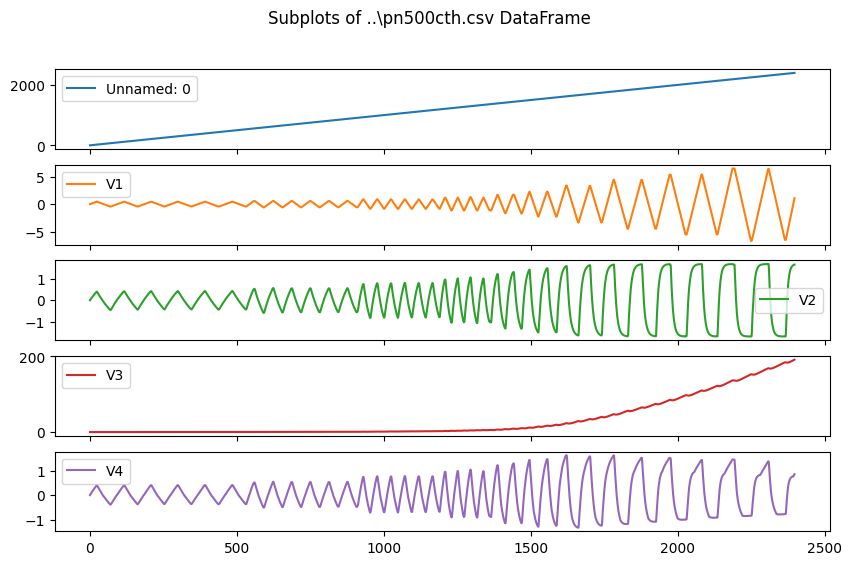

In [43]:
total_dict = {}
for file in df_list:
    d2 = pd.read_csv(file)
    d2.plot(subplots=True, figsize=(10, 6), title=f'Subplots of {file} DataFrame')
    total_dict[file] = d2

In [45]:
total_dict.keys()

dict_keys(['..\\hys_kjh.csv', '..\\pn500.csv', '..\\pn500c.csv', '..\\pn500chst.csv', '..\\pn500csh.csv', '..\\pn500cth.csv'])

In [52]:
def eval_func(vec, gamma, beta, alpha, n):
    dx = np.diff(vec)
    length = len(dx)

    x = np.zeros(length + 1)
    z = np.zeros(length + 1)
    f = np.zeros(length + 1)
    e = np.zeros(length + 1)

    for i in range(length):
        psi = gamma + beta * np.sign(dx[i] * z[i])
        dz = dx[i] * (1 - np.abs(z[i])**n * psi)
        de = z[i] * dx[i]

        x[i+1] = x[i] + dx[i]
        z[i+1] = z[i] + dz
        f[i+1] = f[i] + dz
        e[i+1] = e[i] + de

    return f, z, x, e

In [53]:
def fit_parameters(vec, target_f):
    def loss(params):
        gamma, beta, alpha, n = params
        f, _, _, _ = eval_func(vec, gamma, beta, alpha, n)
        return np.mean((f - target_f)**2)

    # 초기 추정값 및 경계
    initial_guess = [0.1, 0.5, 0.01, 1.0]
    bounds = [(0, 1), (0, 5), (0, 0.1), (0.5, 5)]

    result = minimize(loss, initial_guess, bounds=bounds, method='L-BFGS-B')
    return {
        'gamma': result.x[0],
        'beta': result.x[1],
        'alpha': result.x[2],
        'n': result.x[3],
        'loss': result.fun
    }

In [64]:
list(total_dict.keys())[1:]

['..\\pn500.csv',
 '..\\pn500c.csv',
 '..\\pn500chst.csv',
 '..\\pn500csh.csv',
 '..\\pn500cth.csv']

In [65]:
parmas_dict = {}
for i in list(total_dict.keys())[1:]:
    vec = total_dict[i]['V1'].values
    target_f = total_dict[i]['V4'].values

    parmas = fit_parameters(vec, target_f)
    parmas_dict[i] = parmas

In [55]:
parmas = fit_parameters(vec, target_f)

In [66]:
parmas_dict

{'..\\pn500.csv': {'gamma': np.float64(0.7827659688186965),
  'beta': np.float64(0.22579194134316852),
  'alpha': np.float64(0.01),
  'n': np.float64(0.7064122321574485),
  'loss': np.float64(0.00053259712760039)},
 '..\\pn500c.csv': {'gamma': np.float64(0.684572865461157),
  'beta': np.float64(0.24901480341096136),
  'alpha': np.float64(0.01),
  'n': np.float64(0.8261646942760973),
  'loss': np.float64(0.00940431934942708)},
 '..\\pn500chst.csv': {'gamma': np.float64(0.7816756330430823),
  'beta': np.float64(0.2100977598275356),
  'alpha': np.float64(0.01),
  'n': np.float64(0.8114851720463777),
  'loss': np.float64(0.019587320741479723)},
 '..\\pn500csh.csv': {'gamma': np.float64(0.6515732540641231),
  'beta': np.float64(0.2279692387727718),
  'alpha': np.float64(0.01),
  'n': np.float64(1.0213683166005965),
  'loss': np.float64(0.04297298503684662)},
 '..\\pn500cth.csv': {'gamma': np.float64(0.6394118656946238),
  'beta': np.float64(0.24755289918746778),
  'alpha': np.float64(0.01),